In [44]:
import numpy as np 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [45]:
def random_roll_transform(img):
    # img shape é [C, H, W] -> [1, 28, 28]
    shift = np.random.randint(-10, 11)
    # dims=2 é a largura (width) no formato [C, H, W]
    return torch.roll(img, shifts=shift, dims=2)

transform1 = transforms.Compose([transforms.ToTensor()])

# Define a transformação para converter a imagem em tensor
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Lambda(random_roll_transform)])



# Baixa e carrega o dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform1)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform2)

In [46]:
batchsize = 64
loaderTrain = DataLoader(train_data, shuffle=True, batch_size=batchsize, drop_last=True)
loaderTest = DataLoader(test_data, batch_size=len(test_data))

In [47]:
torch.argmax(train_data[1][0], axis=1)

tensor([[ 0,  0,  0,  0,  0,  0, 19, 19, 14, 12, 11, 10,  9,  9,  7,  6,  9,  4,
          5,  6,  9, 14, 14,  0,  0,  0,  0,  0]])

In [48]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [49]:
tmp = loaderTest.dataset[0][0]
tmp = tmp.reshape(28,28)
tmp

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

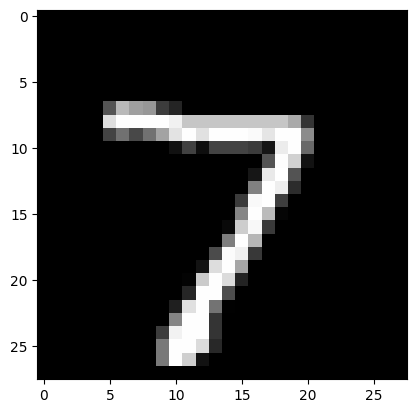

In [50]:
plt.imshow(tmp, cmap="gray")




In [51]:
len(loaderTest.dataset)

10000

In [52]:
# for i in range(len(loaderTest.dataset)):
#     img = loaderTest.dataset[i][0]
    
#     randroll = np.random.randint(-10,11)
#     img = torch.roll(img.reshape(28,28), randroll, dims=1)
    
#     loaderTest.dataset[i][0] = img.reshape((1,28,28))

In [53]:
def createMNISTNet():
    class ann(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.bnIn = nn.BatchNorm1d(784)
            self.input = nn.Linear(784, 64)
            
            self.bn1 = nn.BatchNorm1d(64)
            self.fc1 = nn.Linear(64,32)
            
            self.bn2 = nn.BatchNorm1d(32)
            self.fc2 = nn.Linear(32,32)
            
            self.bn3 = nn.BatchNorm1d(32)
            self.output = nn.Linear(32,10)
        
        def forward(self, x):
            x = x.view(-1,784)
            
            x = F.relu(self.bnIn(x))
            x = self.input(x)
            
            x = F.relu(self.bn1(x))
            x = self.fc1(x)
            x = F.relu(self.bn2(x))
            x = self.fc2(x)
            x = F.relu(self.bn3(x))
            
            return torch.log_softmax(self.output(x), axis=1)
    
    net = ann()
    lossfun = nn.NLLLoss()
    
    optimizer = torch.optim.Adam(net.parameters(), lr=.01)
    
    return net, lossfun, optimizer

def trainModel(net, lossfun, optimizer):
    trainAcc = []
    testAcc = []
    losses = []
    
    for epoch in range(20):
        batchAcc = []
        batchLoss = []
        net.train()
        
        for X,y in loaderTrain:
            y_pred = net(X)
            
            loss = lossfun(y_pred, y)
            batchLoss.append(loss.item())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = 100*torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item()
            batchAcc.append(acc)
    
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))

        net.eval()

        X, y = next(iter(loaderTest))
        y_pred = net(X)

        testAcc.append(100*torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item())
    return trainAcc, testAcc, losses
    
        
            

In [54]:
net, lossfun, optimizer = createMNISTNet()
X,y = next(iter(loaderTrain))

y_pred = net(X)

print(y_pred)
loss = lossfun(y_pred,y)
print("Loss", loss)

tensor([[-2.4820, -1.9201, -2.8112, -2.3887, -2.7218, -2.0918, -2.1899, -2.6207,
         -2.0389, -2.1727],
        [-2.3960, -2.7427, -3.1719, -2.0326, -2.2336, -3.0573, -1.9387, -2.6314,
         -1.4297, -2.7776],
        [-2.9657, -2.3859, -2.5750, -2.2734, -2.3745, -2.1771, -2.0995, -2.0857,
         -1.9235, -2.5498],
        [-3.3968, -2.8859, -2.6989, -1.8820, -1.1131, -2.9506, -2.3018, -3.3748,
         -2.4516, -2.4098],
        [-3.2276, -2.0250, -3.7571, -2.0243, -3.2260, -1.5117, -2.2062, -2.3225,
         -2.2313, -2.3317],
        [-2.9376, -2.6639, -2.5703, -2.2196, -2.2474, -1.6510, -2.4515, -2.4435,
         -1.9950, -2.4581],
        [-2.6437, -2.3385, -2.7141, -2.1941, -2.0836, -2.3524, -2.2410, -2.8313,
         -1.8219, -2.2250],
        [-2.8717, -2.5906, -2.3392, -2.1650, -2.3978, -2.3715, -2.1981, -2.0792,
         -1.9420, -2.3693],
        [-2.1938, -2.0460, -2.5760, -2.2001, -2.3756, -2.2481, -2.6218, -2.4183,
         -2.3004, -2.1904],
        [-2.7758, -

In [55]:
print(torch.exp(y_pred))

tensor([[0.0836, 0.1466, 0.0601, 0.0917, 0.0658, 0.1235, 0.1119, 0.0728, 0.1302,
         0.1139],
        [0.0911, 0.0644, 0.0419, 0.1310, 0.1071, 0.0470, 0.1439, 0.0720, 0.2394,
         0.0622],
        [0.0515, 0.0920, 0.0762, 0.1030, 0.0931, 0.1134, 0.1225, 0.1242, 0.1461,
         0.0781],
        [0.0335, 0.0558, 0.0673, 0.1523, 0.3285, 0.0523, 0.1001, 0.0342, 0.0862,
         0.0898],
        [0.0397, 0.1320, 0.0234, 0.1321, 0.0397, 0.2205, 0.1101, 0.0980, 0.1074,
         0.0971],
        [0.0530, 0.0697, 0.0765, 0.1087, 0.1057, 0.1919, 0.0862, 0.0869, 0.1360,
         0.0856],
        [0.0711, 0.0965, 0.0663, 0.1115, 0.1245, 0.0951, 0.1064, 0.0589, 0.1617,
         0.1081],
        [0.0566, 0.0750, 0.0964, 0.1147, 0.0909, 0.0933, 0.1110, 0.1250, 0.1434,
         0.0935],
        [0.1115, 0.1293, 0.0761, 0.1108, 0.0930, 0.1056, 0.0727, 0.0891, 0.1002,
         0.1119],
        [0.0623, 0.1133, 0.0888, 0.0909, 0.1317, 0.0908, 0.0656, 0.0440, 0.1624,
         0.1502],
        [0

In [56]:
train, test, loss = trainModel(net, lossfun, optimizer)

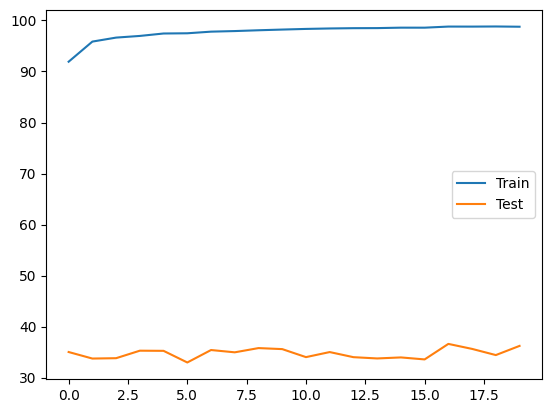

In [57]:
plt.plot(train)
plt.plot(test)
plt.legend("Train Test".split())


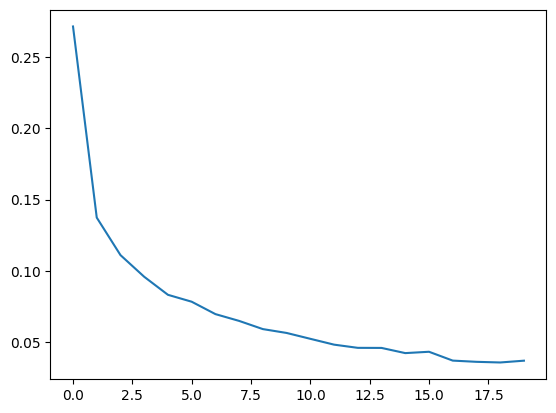

In [58]:
plt.plot(loss)

In [59]:
X, y = next(iter(loaderTest))
y_pred = net(X)

In [60]:
torch.exp(y_pred[0])

tensor([4.0844e-19, 5.2109e-17, 2.4818e-16, 1.2733e-08, 4.4433e-18, 9.9990e-01,
        1.4711e-24, 9.3688e-05, 1.3338e-25, 2.5958e-06],
       grad_fn=<ExpBackward0>)